# Answer1: (THEORY AND CONCEPT)
Batch normalization is a technique used in artificial neural networks to improve the training speed and stability by normalizing the input of each layer. In neural networks, especially deep ones, the distribution of input values to each layer can change during training due to parameter updates in previous layers. This phenomenon is known as internal covariate shift.

Batch normalization addresses this issue by normalizing the inputs of each layer to have a mean of zero and a standard deviation of one. This is typically done by calculating the mean and standard deviation of the inputs within each mini-batch during training. Then, the inputs are normalized using these batch-wise statistic.

Using batch normalization during training offers several benefits:

1. **Faster convergence**: Batch normalization helps in stabilizing the training process by reducing internal covariate shift. This allows neural networks to converge faster since each layer's inputs are normalized, preventing saturation of activation functions and vanishing gradients.

2. **Higher learning rates**: Normalizing the inputs helps to keep activations within a certain range, making it possible to use higher learning rates without the risk of divergence or oscillation during training. This accelerates the learning process and enables faster convergence to a good solution.

3. **Reduction of overfitting**: Batch normalization acts as a form of regularization by adding noise to the activations. This noise helps to prevent overfitting, reducing the need for other regularization techniques such as dropout or weight decay.

4. **Stability across different mini-batches**: Since batch normalization normalizes the inputs within each mini-batch, it reduces the dependency on the specific choice of mini-batch and helps to stabilize the training process. This makes the optimization more robust and less sensitive to the ordering or distribution of training data.

5. **Improved generalization**: By reducing internal covariate shift and overfitting, batch normalization helps neural networks generalize better to unseen data. This leads to better performance on validation and test datasets, resulting in more reliable models.

6. **Facilitation of deeper networks**: Batch normalization enables the training of deeper neural networks by mitigating the vanishing gradient problem. With normalized inputs, gradients can flow more easily through the network, allowing for the successful training of very deep architectures.

Overall, batch normalization is a powerful technique that enhances the stability, speed, and performance of neural network training, making it an essential component in many modern deep learning architectures.

The working principle of batch normalization involves two main steps: normalization and the introduction of learnable parameters for scaling and shifting.

1. **Normalization Step**:
   - For each mini-batch during training, batch normalization computes the mean (\(\mu\)) and the standard deviation (\(\sigma\)) of the activations across all examples in the batch for each feature.
   - The activations for each feature are then normalized using these batch-wise statistics. This is done to ensure that the inputs to each layer have a consistent distribution, which helps stabilize the training process.
   - Mathematically, the normalization step can be represented as:
     \[
     \hat{x}_i = \frac{x_i - \mu}{\sqrt{\sigma^2 + \epsilon}}
     \]
     Where:
     - \(x_i\) is the input activation for a particular feature.
     - \(\mu\) is the mean of the activations for that feature in the mini-batch.
     - \(\sigma\) is the standard deviation of the activations for that feature in the mini-batch.
     - \(\epsilon\) is a small constant added for numerical stability to avoid division by zero.

2. **Learnable Parameters**:
   - After normalization, the normalized activations are scaled and shifted using learnable parameters \(\gamma\) and \(\beta\).
   - These parameters allow the network to learn the optimal scaling and shifting for each feature, which can help preserve the representational capacity of the network.
   - Mathematically, the scaling and shifting step can be represented as:
     \[
     y_i = \gamma \hat{x}_i + \beta
     \]
     Where:
     - \(\gamma\) is the scale parameter.
     - \(\beta\) is the shift parameter.
     - \(y_i\) is the final output after scaling and shifting.

During the training process, both \(\gamma\) and \(\beta\) are learned along with the other parameters of the network using backpropagation and gradient descent. These parameters are optimized to minimize the loss function, effectively tuning the normalization process to improve the performance of the network.

By combining normalization with learnable parameters, batch normalization enables the network to adaptively adjust the distribution of activations for each layer, leading to faster and more stable training, as well as improved generalization performance.

# Answer2: (IMPLEMENTATION)

In [1]:
!pip install tensorflow


In [3]:
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
import warnings
warnings.filterwarnings("ignore")

# Define the model architecture
model_no_bn = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model_no_bn.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# Train the model
history_no_bn = model_no_bn.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8747 - loss: 0.4257 - val_accuracy: 0.9624 - val_loss: 0.1261
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9683 - loss: 0.1069 - val_accuracy: 0.9717 - val_loss: 0.0938
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9769 - loss: 0.0720 - val_accuracy: 0.9702 - val_loss: 0.0958
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9845 - loss: 0.0478 - val_accuracy: 0.9748 - val_loss: 0.0793
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9862 - loss: 0.0417 - val_accuracy: 0.9737 - val_loss: 0.0915
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9896 - loss: 0.0319 - val_accuracy: 0.9787 - val_loss: 0.0797
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9908 - loss: 0.0274 - val_accuracy: 0.9783 - val_loss: 0.0754
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9937 - loss: 0.0196 - 

In [5]:
from tensorflow.keras.layers import BatchNormalization

# Define the model architecture with batch normalization
model_bn = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

# Compile the model
model_bn.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Train the model
history_bn = model_bn.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8837 - loss: 0.3971 - val_accuracy: 0.9596 - val_loss: 0.1341
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9615 - loss: 0.1259 - val_accuracy: 0.9705 - val_loss: 0.0968
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9721 - loss: 0.0925 - val_accuracy: 0.9719 - val_loss: 0.0873
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9750 - loss: 0.0798 - val_accuracy: 0.9750 - val_loss: 0.0866
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9809 - loss: 0.0621 - val_accuracy: 0.9746 - val_loss: 0.0763
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9820 - loss: 0.0562 - val_accuracy: 0.9753 - val_loss: 0.0799
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9848 - loss: 0.0469 - val_accuracy: 0.9788 - val_loss: 0.0706
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9850 - loss: 0.0455 - 

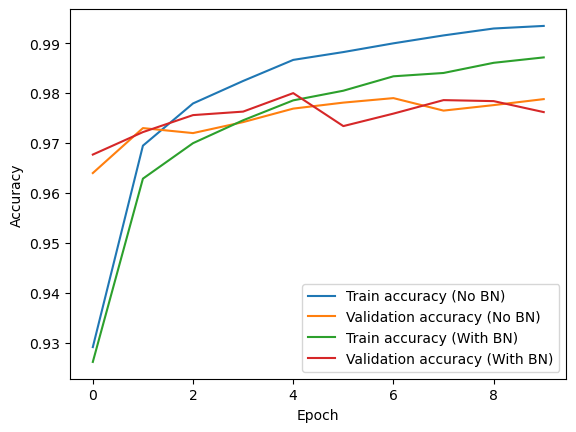

In [9]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history_no_bn.history['accuracy'], label='Train accuracy (No BN)')
plt.plot(history_no_bn.history['val_accuracy'], label='Validation accuracy (No BN)')
plt.plot(history_bn.history['accuracy'], label='Train accuracy (With BN)')
plt.plot(history_bn.history['val_accuracy'], label='Validation accuracy (With BN)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Answer3: (Experimentation and Analysis)

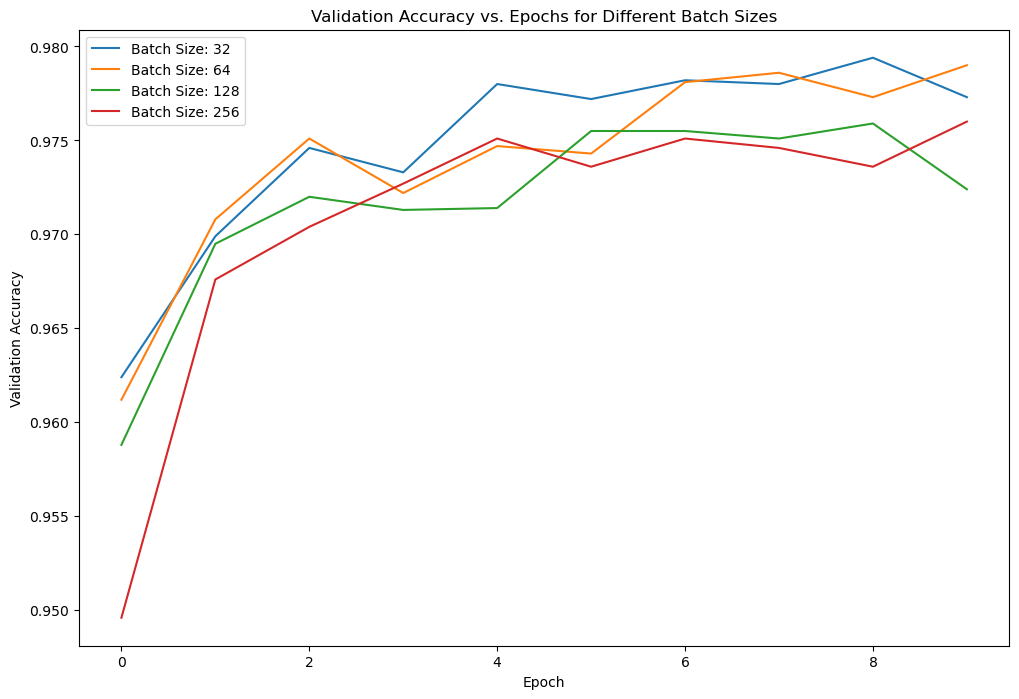

In [6]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization
import matplotlib.pyplot as plt

# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the neural network architecture with batch normalization
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
    ])
    return model

# Function to train the model with different batch sizes
def train_model(batch_size):
    model = create_model()
    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_data=(x_test, y_test), verbose=0)
    return history

# List of batch sizes to experiment with
batch_sizes = [32, 64, 128, 256]

# Train models with different batch sizes and collect training history
histories = {}
for batch_size in batch_sizes:
    history = train_model(batch_size)
    histories[batch_size] = history

# Plot training history for each batch size
plt.figure(figsize=(12, 8))
for batch_size, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'Batch Size: {batch_size}')
plt.title('Validation Accuracy vs. Epochs for Different Batch Sizes')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

Experimenting with different batch sizes can indeed have a significant impact on the training dynamics and model performance. Let's discuss how:

1. **Effect on Training Dynamics**:
   - Larger batch sizes typically lead to faster convergence since each update step is based on more data, which can provide a more accurate estimate of the true gradient direction. However, larger batch sizes may also lead to more noisy updates, especially when the data is highly varied.
   - Smaller batch sizes may result in slower convergence but can lead to better generalization since each update step is based on less data, allowing the model to adapt more flexibly to different patterns in the data.

2. **Effect on Model Performance**:
   - In practice, the choice of batch size is often a trade-off between computational efficiency and model performance. Larger batch sizes can utilize parallel computation more efficiently, especially on GPU, leading to faster training times. However, they may also suffer from overfitting or convergence to suboptimal solutions.
   - Smaller batch sizes can lead to better generalization but may require more computation time per epoch due to less efficient use of parallelism.

Now, let's discuss the advantages and potential limitations of batch normalization in improving the training of neural networks:

Advantages:

1. **Stabilizes Training**: Batch normalization helps in stabilizing the training process by reducing internal covariate shift. This leads to more stable gradients and faster convergence, especially in deeper networks.
  
2. **Enables Higher Learning Rates**: Batch normalization allows the use of higher learning rates during training, which can accelerate convergence without causing divergence or oscillations in the training process.
  
3. **Improves Generalization**: By normalizing the activations of each layer, batch normalization reduces the reliance of the model on specific initialization or regularization techniques. This often leads to better generalization performance on unseen data.

4. **Reduces Sensitivity to Initialization**: Batch normalization reduces the sensitivity of the network to the choice of weight initialization, making it easier to train deep networks without careful initialization.

5. **Regularization Effect**: Batch normalization acts as a form of regularization by adding noise to the activations during training, similar to dropout. This can help in reducing overfitting and improving the model's ability to generalize.

Limitations:

1. **Increased Computational Overhead**: Batch normalization introduces additional computations during both training and inference, which can increase the overall computational cost, especially for large-scale models.

2. **Dependency on Batch Size**: Batch normalization depends on statistics computed over mini-batches during training. Therefore, the effectiveness of batch normalization can be influenced by the choice of batch size, and it may not perform optimally with very small batch sizes.

3. **Not Always Necessary**: In some cases, batch normalization may not provide significant benefits, especially for shallow networks or simple datasets where internal covariate shift is not a major issue.

Overall, batch normalization is a powerful technique for improving the training of neural networks, but it should be used judiciously and in conjunction with other regularization techniques to achieve the best performance.